# Problem Set 2 --Q1
## Ying Sun

1. Numerical differentiation exercises

1.1 Problem 1

In [1]:
from matplotlib import pyplot as plt
from sympy import *
import numpy as np
from math import pi

# Takes the symbolic derivative with respect to x using SymPy
x = Symbol('x')
y = (sin(x) + 1) ** (sin(cos(x)))
diff(y, x)

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

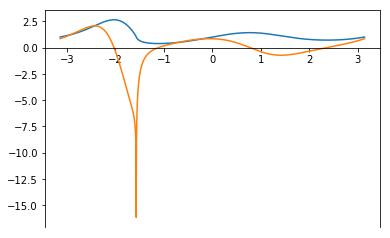

In [2]:
# Lambdify  and plot the resulting function
x_vector = np.linspace(-pi, pi, 10000)
f =  lambdify(x, y, 'numpy')
f_prime = lambdify(x, diff(y, x), 'numpy')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(x_vector, f(x_vector))
plt.plot(x_vector, f_prime(x_vector))

1.2 Problem 2

In [3]:
def forward_1(x, h=0.001):
    return (f(x+h)-f(x))/h 
        
def forward_2(x, h=0.001):
    return (4*f(x+h)-f(x+2*h)-3*f(x))/(2*h)
   
def backward_1(x, h=0.001):
    return (f(x)-f(x-h))/h 
  
def backward_2(x, h=0.001):
    return (-4*f(x-h)+f(x-2*h)+3*f(x))/(2*h)
    
def center_2(x, h=0.001):
    return (f(x+h)-f(x-h))/(2*h)
    
def center_4(x, h=0.001):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h) 
    

Text(0, 0.5, 'Derivatives of function')

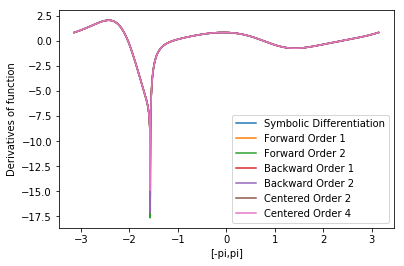

In [4]:
plt.plot(x_vector, f_prime(x_vector), label = 'Symbolic Differentiation')
plt.plot(x_vector, forward_1(x_vector), label = 'Forward Order 1')
plt.plot(x_vector, forward_2(x_vector), label = 'Forward Order 2')
plt.plot(x_vector, backward_1(x_vector), label = 'Backward Order 1')
plt.plot(x_vector, backward_2(x_vector), label = 'Backward Order 2')
plt.plot(x_vector, center_2(x_vector), label = 'Centered Order 2')
plt.plot(x_vector, center_4(x_vector), label = 'Centered Order 4')
plt.legend(loc = 'lower right')
plt.xlabel("[-pi,pi]")
plt.ylabel("Derivatives of function")

1.3 Problem 3

In [5]:
# Compute absolute error
def Compare(x):
    x0 = f_prime(x)
    hvec = np.logspace(-8,0,9)
    plt.plot(hvec, abs([forward_1(x, h=i) for i in hvec]-x0), label = 'Forward Order 1') 
    plt.plot(hvec, abs([forward_2(x, h=i) for i in hvec]-x0), label = 'Forward Order 2') 
    plt.plot(hvec, abs([backward_1(x, h=i) for i in hvec]-x0), label = 'Backward Order 1') 
    plt.plot(hvec, abs([backward_2(x, h=i) for i in hvec]-x0), label = 'Backward Order 2') 
    plt.plot(hvec, abs([center_2(x, h=i) for i in hvec]-x0), label = 'Centered Order 2') 
    plt.plot(hvec, abs([center_4(x, h=i) for i in hvec]-x0), label = 'Centered Order 4') 
    plt.legend(loc='upper left')
    plt.xlabel("h")
    plt.ylabel("Absolute Error")
    plt.loglog()

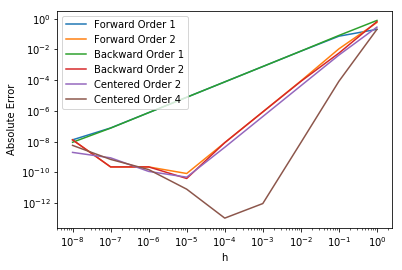

In [6]:
# Graph at fixed point (x = 1)
Compare(1)

1.4 Problem 4

In [7]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = np.load("plane.npy")
plane_df = pd.DataFrame(df, columns = ['t', 'alpha', 'beta'])
plane_df['alpha'] = np.deg2rad(plane_df['alpha'])
plane_df['beta'] = np.deg2rad(plane_df['beta'])
a = 500

# Calculate the location of the plane
plane_df['x'] = (a*np.tan(plane_df['beta']))/(np.tan(plane_df['beta'])-\
                                              np.tan(plane_df['alpha']))
plane_df['y'] = (a*np.tan(plane_df['beta'])*np.tan(plane_df['alpha']))\
/(np.tan(plane_df['beta'])-np.tan(plane_df['alpha']))

# Approximate x_prime and y_prime
plane_df['x_prime'] = 0
plane_df['y_prime'] = 0
plane_df['x_prime'][0] = plane_df['x'][1] - plane_df['x'][0]
plane_df['x_prime'][7] = plane_df['x'][7] - plane_df['x'][6]
plane_df['y_prime'][0] = plane_df['y'][1] - plane_df['y'][0]
plane_df['y_prime'][7] = plane_df['y'][7] - plane_df['y'][6]
for i in range(1, 7):
    plane_df['x_prime'][i] = 0.5 * (plane_df['x'][i+1] - plane_df['x'][i-1])
    plane_df['y_prime'][i] = 0.5 * (plane_df['y'][i+1] - plane_df['y'][i-1])
plane_df['speed'] = np.sqrt(plane_df['x_prime'] **2 + plane_df['y_prime']**2)
plane_df

,t,alpha,beta,x,y,x_prime,y_prime,speed
0,7.0,0.981748,1.178795,1311.271337,1962.456239,44,12,45.607017
1,8.0,0.969181,1.161866,1355.936476,1975.114505,45,12,46.572524
2,9.0,0.956440,1.144761,1401.918398,1987.346016,47,12,48.507731
3,10.0,0.943525,1.127308,1450.497006,2000.840713,48,13,49.729267
4,11.0,0.930959,1.110378,1498.640350,2013.512411,46,12,47.539457
5,12.0,0.919614,1.095020,1543.798955,2025.792234,49,13,50.695167
6,13.0,0.906524,1.077217,1598.041382,2040.990583,51,14,52.886671
7,14.0,0.895005,1.061509,1647.596093,2055.065571,49,14,50.960769


In [8]:
plane_df[['t', 'speed']]

,t,speed
0,7.0,45.607017
1,8.0,46.572524
2,9.0,48.507731
3,10.0,49.729267
4,11.0,47.539457
5,12.0,50.695167
6,13.0,52.886671
7,14.0,50.960769


1.5 Problem 5

In [9]:
 def Jacobian(f, x0, h): 
        num_f = len(f)
        dim = len(x0) 
        J = zeros(num_f, dim)
        for i, sf in enumerate(f):
            for j in range(dim):
                func= lambdify((x,y), sf, 'numpy')
                plus = x0 + h* (np.identity(dim))[:, j]
                minus = x0 - h*(np.identity(dim))[:, j]
                # Use the second order centered difference quotient
                J[i, j] = (func(plus[0], plus[1])-func(minus[0], minus[1]))/(2*h)
        return J

In [10]:
#Test the Jacobian calculation function 
x = Symbol('x')
y = Symbol('y')
x0=(1,1)
h=0.001
Jacobian([x**2,x**3-y], x0, h)


Matrix([
[1.99999999999984,                0.0],
[3.00000099999986, -0.999999999999945]])

1.6 Problem 7

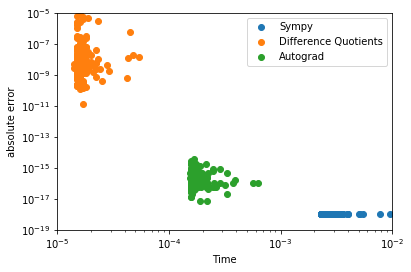

In [11]:
import time
import math
import sympy as sy
from autograd import numpy as anp
from autograd import grad
import numpy as np

def Time(N): 
        t1 = np.zeros(N,dtype='float')
        t2 = np.zeros(N,dtype='float')
        t3 = np.zeros(N,dtype='float')
        abs_error1 = np.array([1e-18] * N)
        abs_error2 = np.zeros(N,dtype='float')
        abs_error3 = np.zeros(N,dtype='float')
        y = lambda x: (anp.sin(x)+1)**(anp.sin(anp.cos(x)))
        gy = grad(y)
        for i in range(N):
            x = np.random.uniform(-math.pi, math.pi)
            time1 = time.clock()
            z =sy.symbols('z')
            y_prime = sy.diff((sy.sin(z)+1)**sy.sin(sy.cos(z)), z)
            f_prime = sy.lambdify(z, y_prime, "numpy")
            prime = f_prime(x)
            time2 = time.clock()
            t1[i] = time2 - time1
            time3 = time.clock()
            approx_prime = center_4(x, h = 0.01)
            time4 = time.clock()
            t2[i] = time4 - time3
            abs_error2[i] = abs(approx_prime - prime)
            time5 = time.clock()
            auto_approx_prime = gy(x)
            time6 = time.clock()
            t3[i] = time6 - time5
            abs_error3[i] = abs(auto_approx_prime- prime)
            
        return t1, t2, t3, abs_error1, abs_error2, abs_error3
    
t1, t2, t3, abs_error1, abs_error2, abs_error3 = Time(200)

plt.scatter(t1, abs_error1, label='Sympy') 
plt.scatter(t2 ,abs_error2, label='Difference Quotients') 
plt.scatter(t3, abs_error3, label='Autograd')
plt.loglog()
plt.xlim(10**-5,10**-2)
plt.ylim(10**-19,10**-5)
plt.xlabel("Time")
plt.ylabel("absolute error")
plt.legend()
 